## 날씨 데이터 크롤링

In [60]:
import urllib.request as rq
from bs4 import BeautifulSoup as bs
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [4]:
#기상청 url 주소
url = 'https://www.weather.go.kr/weather/observation/currentweather.jsp'
    
#url의 웹페이지 정보를 가져올 객체 생성
rq.urlopen(url)

In [5]:
url_check = rq.urlopen(url)
url_check.read()

b'<!DOCTYPE html>\n\n<html lang="ko">\n\t<head>\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t\t<title>\xb5\xb5\xbd\xc3\xba\xb0 \xc7\xf6\xc0\xe7\xb3\xaf\xbe\xbe &gt; \xc1\xf6\xbb\xf3\xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 &gt; \xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 &gt; \xb3\xaf\xbe\xbe &gt; \xb1\xe2\xbb\xf3\xc3\xbb </title>\n\t\t<link rel="shortcut icon" href="https://www.kma.go.kr/iphone-shortcut.png" />\n\t\t<link rel=\'apple-touch-icon-precomposed\' href=\'https://www.kma.go.kr/iphone-shortcut.png\'/> \n\t\t<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/base.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/common.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/weather-layout.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/component.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css

In [6]:
#web page 정보 읽어오기 또다른 방법
import requests as rqs

#가져오기 성공: 200 리턴
#가져오기 실패: 404 리턴
#서버 오류: 500 리턴

In [7]:
rqs.get(url)

<Response [200]>

In [10]:
#response객체 생성
#response에 저장된 내용: 결과(200, 404 등) & content 속성(가져온 web page 정보)
response = rqs.get(url)

In [11]:
response

<Response [200]>

In [12]:
#한글을 웹 상의 숫자 그대로 출력
#encoding: 한글 -> 숫자
#즉 encoding 상태로 출력
#웹상에서 숫자, 영어, 서유럽어만 문자로 표현되고 나머지 언어는 숫자로 변환해야 함
response.content

b'<!DOCTYPE html>\n\n<html lang="ko">\n\t<head>\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t\t<title>\xb5\xb5\xbd\xc3\xba\xb0 \xc7\xf6\xc0\xe7\xb3\xaf\xbe\xbe &gt; \xc1\xf6\xbb\xf3\xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 &gt; \xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 &gt; \xb3\xaf\xbe\xbe &gt; \xb1\xe2\xbb\xf3\xc3\xbb </title>\n\t\t<link rel="shortcut icon" href="https://www.kma.go.kr/iphone-shortcut.png" />\n\t\t<link rel=\'apple-touch-icon-precomposed\' href=\'https://www.kma.go.kr/iphone-shortcut.png\'/> \n\t\t<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/base.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/common.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/weather-layout.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/component.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css

In [13]:
#숫자 -> 한글로 변환하여 출력; decoding
response.text

'<!DOCTYPE html>\n\n<html lang="ko">\n\t<head>\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t\t<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>\n\t\t<link rel="shortcut icon" href="https://www.kma.go.kr/iphone-shortcut.png" />\n\t\t<link rel=\'apple-touch-icon-precomposed\' href=\'https://www.kma.go.kr/iphone-shortcut.png\'/> \n\t\t<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/base.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/common.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/weather-layout.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/component.css?ver=20210128" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/add_2018.css?ver=20210128" />\n\t\t\n\t\t\n\t\t\t<link rel="stylesheet" type="text/css" href="/share/css/weather-obs.css?ver=20210128" /

In [14]:
#bs는 encoding, decoding 상관없이 잘 처리
bs(response.content, 'html.parser')

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="shortcut icon"/>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="apple-touch-icon-precomposed"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/base.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/common.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-layout.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/component.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/add_2018.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-obs.css?ver=20210128" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js"></script>
<script src="/share/js/weather-com

In [17]:
parser = bs(response.text, 'html.parser')
parser

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="shortcut icon"/>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="apple-touch-icon-precomposed"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/base.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/common.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-layout.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/component.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/add_2018.css?ver=20210128" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-obs.css?ver=20210128" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js"></script>
<script src="/share/js/weather-com

In [24]:
table = parser.find('table', {'class':'table_develop3'})
table

<table class="table_develop3" summary="기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.">
<caption>기상실황표</caption>
<colgroup>
<col style="width:14%"/>
<col style="width:12%"/>
<col style="width:7%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:5%"/>
<col style="width:6%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:5%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:6%"/>
<col/>
</colgroup>
<thead>
<tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" id="headers-weather" scope="col">날씨</th>
<th class="top_line" colspan="3" id="headers-temp" scope="col">기온(℃)</th>
<th class="top_line" colspan="3" id="headers-rain" scope="col">강수</th>
<th class="top_line" colspan="2" id="headers-wind" scope="col">바람</th>
<th class="top_line" id="headers-press" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th class="nm" headers="header

In [25]:
#지점, 현재기온, 습도 크롤링
#find_all로 사용해도 됨
table.findAll('tr')

[<tr class="table_header" id="table_header1">
 <th class="top_line" rowspan="2" scope="col">
 		지점
 		</th>
 <th class="top_line" colspan="4" id="headers-weather" scope="col">날씨</th>
 <th class="top_line" colspan="3" id="headers-temp" scope="col">기온(℃)</th>
 <th class="top_line" colspan="3" id="headers-rain" scope="col">강수</th>
 <th class="top_line" colspan="2" id="headers-wind" scope="col">바람</th>
 <th class="top_line" id="headers-press" scope="col">기압(hPa)</th>
 </tr>,
 <tr class="table_header" id="table_header2">
 <th class="nm" headers="headers-weather" scope="col">현재일기 </th>
 <th class="nm" headers="headers-weather" scope="col">시정<br/>km</th>
 <th class="nm" headers="headers-weather" scope="col">운량<br/>1/10</th>
 <th class="nm" headers="headers-weather" scope="col">중하운량</th>
 <th class="nm" headers="headers-temp" scope="col">현재<br/>기온</th>
 <th class="nm" headers="headers-temp" scope="col">이슬점<br/>온도</th>
 <th class="nm" headers="headers-temp" scope="col">체감<br/>온도</th>
 <th class

In [29]:
for tr in table.find_all('tr'):
    print('tr:', tr)
    print('=' * 80)

tr: <tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" id="headers-weather" scope="col">날씨</th>
<th class="top_line" colspan="3" id="headers-temp" scope="col">기온(℃)</th>
<th class="top_line" colspan="3" id="headers-rain" scope="col">강수</th>
<th class="top_line" colspan="2" id="headers-wind" scope="col">바람</th>
<th class="top_line" id="headers-press" scope="col">기압(hPa)</th>
</tr>
tr: <tr class="table_header" id="table_header2">
<th class="nm" headers="headers-weather" scope="col">현재일기 </th>
<th class="nm" headers="headers-weather" scope="col">시정<br/>km</th>
<th class="nm" headers="headers-weather" scope="col">운량<br/>1/10</th>
<th class="nm" headers="headers-weather" scope="col">중하운량</th>
<th class="nm" headers="headers-temp" scope="col">현재<br/>기온</th>
<th class="nm" headers="headers-temp" scope="col">이슬점<br/>온도</th>
<th class="nm" headers="headers-temp" scope="col">체감<br/>온도</th>
<th class="nm" header

In [30]:
#td 찾기
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    print(tds)
    print('=' * 100)
#0 = 지역, 5 = 온도, -4 = 습도

[]
[]
[<td><a href="/weather/observation/currentweather.jsp?tm=2021.4.28.9:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=105">강릉</a></td>, <td> </td>, <td>20 이상</td>, <td> </td>, <td> </td>, <td>18.9</td>, <td>3.8</td>, <td>18.3</td>, <td> </td>, <td> </td>, <td>37</td>, <td>남서</td>, <td><script>writeWindSpeed('2.9', false, '', '', 1);</script></td>, <td>1014.5</td>]
[<td><a href="/weather/observation/currentweather.jsp?tm=2021.4.28.9:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=259">강진군</a></td>, <td> </td>, <td>12.8</td>, <td> </td>, <td> </td>, <td>16.5</td>, <td>12.2</td>, <td>18.6</td>, <td> </td>, <td> </td>, <td>76</td>, <td>북동</td>, <td><script>writeWindSpeed('1.6', false, '', '', 1);</script></td>, <td>1018.0</td>]
[<td><a href="/weather/observation/currentweather.jsp?tm=2021.4.28.9:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=201">강화</a></td>, <td> </td>, <td>14.7</td>, <td> </td>, <td> </td>, <td>10.5</td>, <td>9.4</td>, <td>

In [40]:
#0 = 지역, 5 = 온도, -4 = 습도 만 출력
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    #print(len(tds))
    
    if len(tds) != 0:
        print('지역:', tds[0].text)
        print('온도:', tds[5].text + '˚C')
        print('습도:', tds[-4].text + '%')
        print('=' * 20)

지역: 강릉
온도: 18.9˚C
습도: 37%
지역: 강진군
온도: 16.5˚C
습도: 76%
지역: 강화
온도: 10.5˚C
습도: 93%
지역: 거제
온도: 18.0˚C
습도: 70%
지역: 거창
온도: 16.7˚C
습도: 63%
지역: 경주시
온도: 18.9˚C
습도: 46%
지역: 고산
온도: 15.9˚C
습도: 97%
지역: 고창
온도: 16.7˚C
습도: 71%
지역: 고창군
온도: 16.8˚C
습도: 73%
지역: 고흥
온도: 16.3˚C
습도: 75%
지역: 광양시
온도: 18.5˚C
습도: 63%
지역: 광주
온도: 17.6˚C
습도: 74%
지역: 구미
온도: 19.3˚C
습도: 40%
지역: 군산
온도: 15.8˚C
습도: 78%
지역: 금산
온도: 17.3˚C
습도: 50%
지역: 김해시
온도: 18.6˚C
습도: 60%
지역: 남원
온도: 16.7˚C
습도: 68%
지역: 남해
온도: 18.5˚C
습도: 62%
지역: 대관령
온도: 12.1˚C
습도: 50%
지역: 대구
온도: 18.5˚C
습도: 66%
지역: 대전
온도: 16.5˚C
습도: 72%
지역: 동두천
온도: 11.9˚C
습도: 89%
지역: 동해
온도: 19.1˚C
습도: 33%
지역: 목포
온도: 15.5˚C
습도: 81%
지역: 문경
온도: 16.9˚C
습도: 46%
지역: 밀양
온도: 17.1˚C
습도: 64%
지역: 백령도
온도: 14.1˚C
습도: 51%
지역: 보령
온도: 13.3˚C
습도: 87%
지역: 보성군
온도: 16.8˚C
습도: 77%
지역: 보은
온도: 15.5˚C
습도: 66%
지역: 봉화
온도: 14.8˚C
습도: 41%
지역: 부산
온도: 18.4˚C
습도: 66%
지역: 부안
온도: 15.5˚C
습도: 88%
지역: 부여
온도: 15.6˚C
습도: 74%
지역: 북강릉
온도: 18.2˚C
습도: 30%
지역: 북창원
온도: 19.0˚C
습도: 64%
지역: 북춘천
온도: 14.1˚C
습도: 71%
지역: 산청
온도: 18.4˚C
습도: 58%


In [42]:
#데이터를 리스트에 저장하기
weather_info = []

for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    
    if len(tds) != 0:
        weather_info.append([tds[0].text, tds[5].text, tds[-4].text])

print(weather_info)

[['강릉', '18.9', '37'], ['강진군', '16.5', '76'], ['강화', '10.5', '93'], ['거제', '18.0', '70'], ['거창', '16.7', '63'], ['경주시', '18.9', '46'], ['고산', '15.9', '97'], ['고창', '16.7', '71'], ['고창군', '16.8', '73'], ['고흥', '16.3', '75'], ['광양시', '18.5', '63'], ['광주', '17.6', '74'], ['구미', '19.3', '40'], ['군산', '15.8', '78'], ['금산', '17.3', '50'], ['김해시', '18.6', '60'], ['남원', '16.7', '68'], ['남해', '18.5', '62'], ['대관령', '12.1', '50'], ['대구', '18.5', '66'], ['대전', '16.5', '72'], ['동두천', '11.9', '89'], ['동해', '19.1', '33'], ['목포', '15.5', '81'], ['문경', '16.9', '46'], ['밀양', '17.1', '64'], ['백령도', '14.1', '51'], ['보령', '13.3', '87'], ['보성군', '16.8', '77'], ['보은', '15.5', '66'], ['봉화', '14.8', '41'], ['부산', '18.4', '66'], ['부안', '15.5', '88'], ['부여', '15.6', '74'], ['북강릉', '18.2', '30'], ['북창원', '19.0', '64'], ['북춘천', '14.1', '71'], ['산청', '18.4', '58'], ['상주', '17.7', '60'], ['서귀포', '17.2', '85'], ['서산', '12.5', '85'], ['서울', '12.9', '81'], ['성산', '17.1', '75'], ['세종', '15.5', '70'], ['속초', '18.7', '36

In [45]:
#weather.csv 파일이 존재한다면 기존 내용 삭제
#존재하지 않는다면 csv파일 새로 생성

#파일 생성위치는 anaconda prompt가 열리는 위치 
#C:\Users\Admin>
with open('weather.csv', 'w') as file:
    file.write('area, temperature, humidity\n')
    for data in weather_info:
        file.write('{0}, {1}, {2}\n' .format(data[0], data[1], data[2]))
    print('file generated')

file generated


In [49]:
#문자열.join(리스트) -> 리스트의 아이템 사이에 문자열을 넣어줌
with open('weather.csv', 'w') as file:
    file.write('area, temperature, humidity\n')
    for data in weather_info:
        row = ', '.join(data)
        file.write(row + '\n')
    print('file generated')

file generated


In [41]:
df = pd.read_csv('weather.csv', index_col = 'area', encoding = 'euc-kr')
df

,temperature,humidity
area,,
강릉,18.9,37
강진군,16.5,76
강화,10.5,93
거제,18.0,70
거창,16.7,63
...,...,...
합천,19.4,58
해남,16.7,74
홍성,13.5,82


In [43]:
big_city = df.loc[['서울', '인천', '대전', '대구', '부산', '광주']]
big_city

,temperature,humidity
area,,
서울,12.9,81
인천,10.5,89
대전,16.5,72
대구,18.5,66
부산,18.4,66
광주,17.6,74


In [48]:
df.loc['서울']

 temperature    12.9
 humidity       81.0
Name: 서울, dtype: float64

In [46]:
df.loc[['서울', '부산']]

,temperature,humidity
area,,
서울,12.9,81
부산,18.4,66


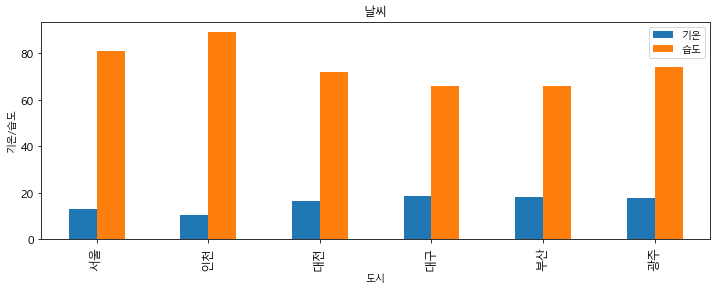

In [58]:
ax = big_city.plot(kind = 'bar', title = '날씨', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('도시')
ax.set_ylabel('기온/습도')
ax.legend(['기온', '습도'])

mpl.rc('font', family = 'Malgun Gothic')
plt.show()

오늘의 평균 기온: 15.73


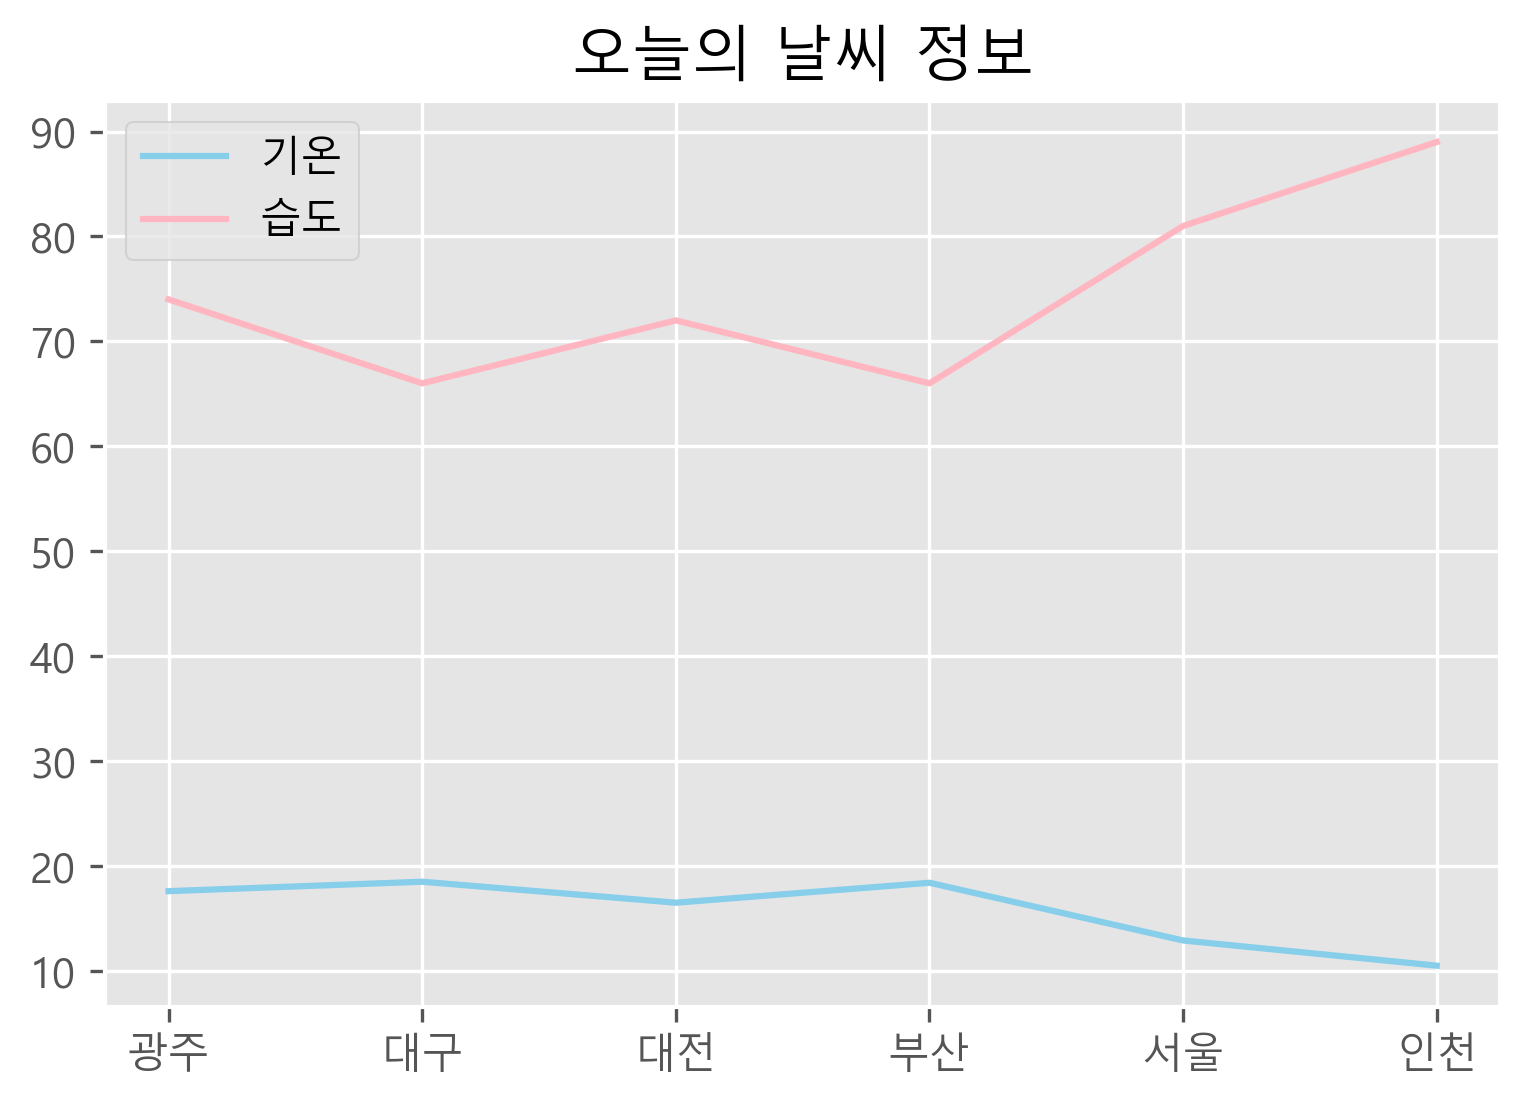

In [112]:
with open('weather.csv') as csv_file:
    data = csv.reader(csv_file)
    header = next(data)
    
    temp = []
    hum = []
    city = []
    cities = ['서울', '인천', '대전', '대구', '부산', '광주']

    
    for row in data:
        if row[0] in cities:
            city.append(row[0])
            temp.append(float(row[1]))
            hum.append(float(row[2]))
    
    total = 0
    for t in temp:
        total += t
    avg = total / len(temp)
    print('오늘의 평균 기온: %.2f' % avg)
    
    plt.plot(city, temp, color = 'skyblue', label = '기온')
    plt.plot(city, hum, color = 'lightpink', label = '습도')
    #plt.plot(range(int(avg)), 'g', color = 'blue')
    plt.rcParams["figure.dpi"] = 300
    plt.rc('font', family = 'Malgun Gothic')
    plt.style.use('ggplot')
    plt.title('오늘의 날씨 정보')
    plt.legend()
    plt.show()

## Selenium

In [1]:
! pip install selenium

distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [2]:
from selenium import webdriver as wd
driver = wd.Chrome(executable_path = 'chromedriver.exe')

In [3]:
url = 'http://www.naver.com'
driver.get(url)

In [6]:
#윤여정 키워드를 입력해줌
driver.find_element_by_id('query').send_keys('윤여정')

In [7]:
#키워드 입력 후 클릭
driver.find_element_by_id('search_btn').click()

In [17]:
#여행정보 크롤링
driver.get('http://tour.interpark.com')

In [18]:
driver.find_element_by_id('SearchGNBText').send_keys('스위스')
driver.find_element_by_class_name('search-btn').click()

In [19]:
#해외여행 정보만 가져옴
driver.find_element_by_id('li_R').click()

In [15]:
import time
for page in range(1, 8):
    print('{} 페이지로 이동'.format(page))
    driver.execute_script('searchModule.SetCategoryList({}, "")'.format(page))
    time.sleep(10)

1 페이지로 이동
2 페이지로 이동
3 페이지로 이동
4 페이지로 이동
5 페이지로 이동
6 페이지로 이동
7 페이지로 이동


In [38]:
box_items = driver.find_elements_by_css_selector('.panelZone>.oTravelBox>.boxList>li')

for li in box_items:
    print('상품명:', li.find_element_by_css_selector('h5.proTit').text)
    
    #'원'을 기준으로 ['100', '원~'] 이므로 가격인 인덱스[0]을 출력
    print('가격:', 
          li.find_element_by_css_selector('strong.proPrice').text.split('원')[0].strip())
    print('=' * 60)

상품명: [스위스/이태리 9일] 1급호텔+체르마트+융프라우+툰호수
가격: 1,900,000
상품명: [스위스/이태리9일] 1급UP! 리기정상식+몽트뢰/프라이부르크
가격: 1,750,000
상품명: [스위스/동유럽 5국8일] 스트라스부르+홀딱반해버린_OZ
가격: 1,857,000
상품명: [서유럽 4국 12일] 이탈리아 완전일주+루체른/베른
가격: 2,550,000
상품명: [서유럽 3국 9일] 융프라우+리기산+스위스집중투어
가격: 2,190,000
상품명: [♥프랑스/스위스/이탈리아/오스트리아/독일 10일]
가격: 2,150,000
상품명: [스위스/이태리9일]1급호텔+융프라우+정상식사
가격: 1,850,000
상품명: [맞춤 여행]스위스/독일 자유 맞춤 견적 문의
가격: 10,000
상품명: [프랑스/스위스 10일]몽생미셸_융프라우_몽트뢰
가격: 2,250,000
상품명: [서유럽 5국 12일] 스트라스부르/베른+융프라우
가격: 2,400,000


In [ ]:
li.find